<a href="https://colab.research.google.com/github/makhijakabir/machine-learning/blob/main/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #cm stands for color map: used to introduce different colors in a chart

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1: A simple cost function

## $f(x) = x^2 + x + 1$

In [ ]:
def f(x):
  return x**2 + x + 1



## linspace generates 'num' number of evenly spaced data units from the lower limit to the upper limit.

In [ ]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500) 
# x_1

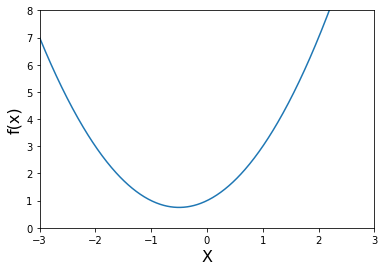

In [ ]:
# plot data using the matplotlib module and it's different functions
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivative
Creating a python function that returns a derivative

$f'(x) = d/dx(f(x)) = d/dx (x^2 + x + 1) = nx^k$ where, $k = n-1$



In [ ]:
def df(x):
  return 2*x + 1

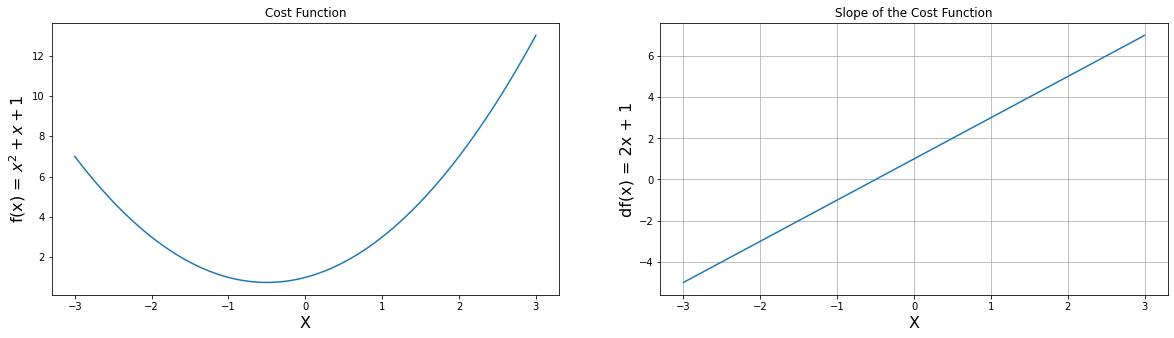

In [ ]:
# plot 2 subplots data using the matplotlib module (subplot) and it's different functions
# The 2 plots are of the derivative and the cost function.

plt.figure(figsize=[20, 5])

# Chart 01: Depicting the Cost Function
plt.subplot (1, 2, 1)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x) = $x^2 + x + 1$', fontsize=16)
plt.plot(x_1, f(x_1))

# Chart 02: Depicting the Derivative function
plt.subplot (1, 2, 2)
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x) = 2x + 1', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1))

plt.show()

## Gradient Descent through loops

#### GRADIENT DESCENT ALGORITHM


---



---


*We need a random starting point, a buffer value, and a descending coeff for the slope.*

*Step 1: Inititlize buffer to the guessed value.*

*Step 2: Calculate the slope of the curve at that very buffer value.*

*Step 3: Set the next value of the move the point to the next value by reducing the above value by coeff times the slope/gradient of the curve at the above value.*

*Step 4: Repeat the process until you reach the local minimum.*

*The more iterations you run the more closer you get to the local minima and more accurate the answer gets.*

Initializing the buffer and the starting values

In [ ]:
guessedX = 3
bufferVal = 0
gamma = 0.1
precision = 0.00001

For visualising the data we need to store the value of guessedX and the slope/gradient/derivative values in 2 different lists.

In [ ]:
guessedxList = [guessedX]
slopeList = [df(guessedX)]

The Actual FOR Loop for the Gradient Descent:


In [ ]:
for i in range(500):
  buffer = guessedX
  grad = df(buffer)
  guessedX = buffer - gamma*grad

  stepSize = abs(guessedX - buffer)

  guessedxList.append(guessedX)
  slopeList.append(df(guessedX))
  
  if (stepSize < precision):
    print("The loop took", i, "cycles to reach the set precision." )
    break

The loop took 50 cycles to reach the set precision.


Printing all the executed values:

In [ ]:
print("All the values of the X steps are:", guessedxList)
print("All the values of the gradient/slope/derivatives are:", slopeList)

print("Local Minima occurs at:", guessedX)
print("Slope or d/dx(f(x)) value at the point is:", df(guessedX))
print("The value of the cost function f(x) here is:", f(guessedX))

All the values of the X steps are: [3, 2.3, 1.7399999999999998, 1.2919999999999998, 0.9335999999999998, 0.6468799999999998, 0.41750399999999976, 0.2340031999999998, 0.08720255999999982, -0.03023795200000015, -0.12419036160000013, -0.1993522892800001, -0.25948183142400005, -0.30758546513920004, -0.34606837211136005, -0.376854697689088, -0.4014837581512704, -0.4211870065210163, -0.43694960521681303, -0.44955968417345044, -0.45964774733876035, -0.46771819787100827, -0.4741745582968066, -0.47933964663744527, -0.4834717173099562, -0.48677737384796493, -0.48942189907837197, -0.49153751926269756, -0.49323001541015804, -0.49458401232812643, -0.4956672098625011, -0.4965337678900009, -0.4972270143120007, -0.4977816114496006, -0.49822528915968045, -0.49858023132774437, -0.4988641850621955, -0.4990913480497564, -0.4992730784398051, -0.4994184627518441, -0.4995347702014753, -0.49962781616118024, -0.4997022529289442, -0.49976180234315537, -0.4998094418745243, -0.49984755349961946, -0.499878042799695

Visualising all the above values

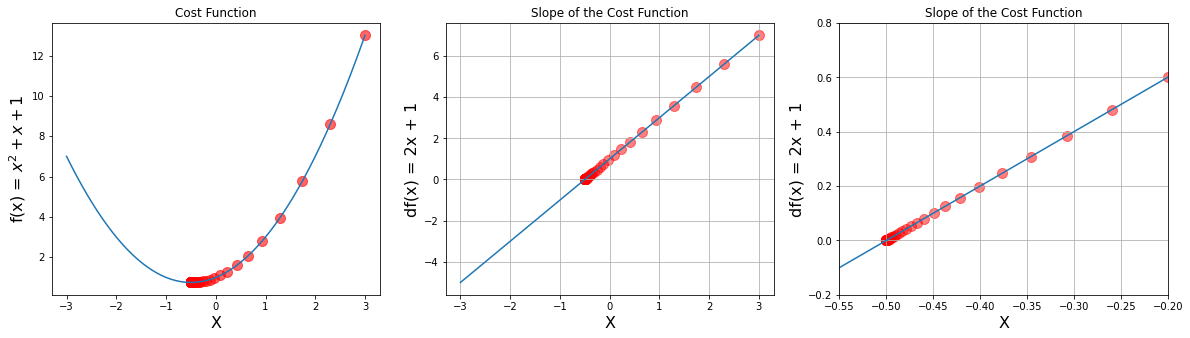

In [ ]:
# Superimpose the gradient descent calculations on original plots

plt.figure(figsize=[20, 5])

# Chart 01: Depicting the Cost Function
# and the adjoining values of x as we move towards the local minima taking tiny steps using the slope.
plt.subplot (1, 3, 1)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x) = $x^2 + x + 1$', fontsize=16)
plt.plot(x_1, f(x_1))
values = np.array(guessedxList)
plt.scatter(values, f(values), color = 'red', s = 100, alpha = 0.6)

# Chart 02: Depicting the Derivative function 
plt.subplot (1, 3, 2)
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x) = 2x + 1', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1))
plt.scatter(guessedxList, slopeList, color = 'red', s = 100, alpha = 0.5)

# Chart 03: Gradient Descent (Close-Up) 
plt.subplot (1, 3, 3)
plt.title('Slope of the Cost Function')
plt.xlim(-0.55, -0.20)
plt.ylim(-0.2, 0.8)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x) = 2x + 1', fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1))
plt.scatter(guessedxList, slopeList, color = 'red', s = 100, alpha = 0.5)

plt.show()

# Example 2: Multiple Minima v/s Initial Guess

## $f(x) = x^4 - 4x^2 + 5$

In [ ]:
#Make Data

x_2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

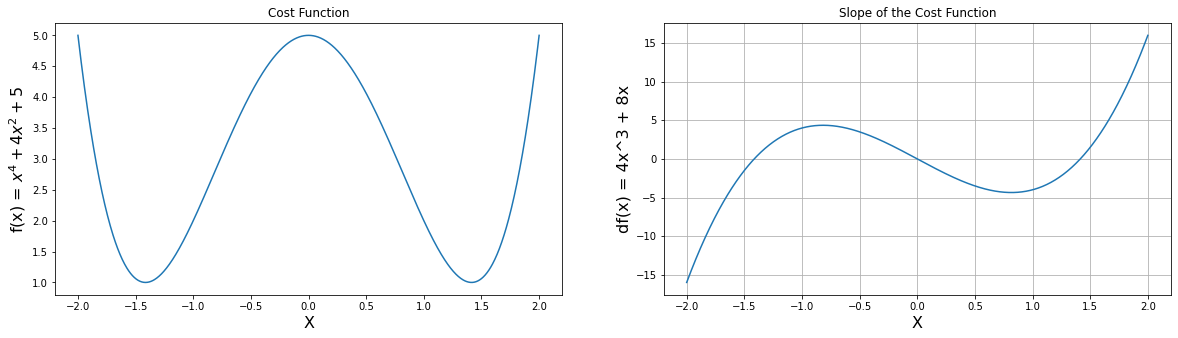

In [ ]:
# plot 2 subplots data using the matplotlib module (subplot) and it's different functions
# The 2 plots are of the derivative and the cost function.

plt.figure(figsize=[20, 5])

# Chart 01: Depicting the Cost Function
plt.subplot (1, 2, 1)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x) = $x^4 + 4x^2 + 5$', fontsize=16)
plt.plot(x_2, g(x_2))

# Chart 02: Depicting the Derivative function
plt.subplot (1, 2, 2)
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x) = 4x^3 + 8x', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2))

plt.show()

# Gradient Descent as a Python Function

#### GRADIENT DESCENT ALGORITHM


---



---


*We need a random starting point, a buffer value, and a descending coeff for the slope.*

*Step 1: Inititlize buffer to the guessed value.*

*Step 2: Calculate the slope of the curve at that very buffer value.*

*Step 3: Set the next value of the move the point to the next value by reducing the above value by coeff times the slope/gradient of the curve at the above value.*

*Step 4: Repeat the process until you reach the local minimum.*

*The more iterations you run the more closer you get to the local minima and more accurate the answer gets.*

In [ ]:
#Gradient Descent as a Fucntion

def gradientDescent(derivativeFunc, guessedX, multiplierGamma = 0.02, precisionValue = 0.0000001, maxIter = 300):

  #For visualising the data we need to store the value of guessedX and the 
  #slope/gradient/derivative values in 2 different lists.

  guessedxList = [guessedX]
  slopeList = [derivativeFunc(guessedX)]

  #The Actual FOR Loop for the Gradient Descent:

  for i in range(maxIter):
    buffer = guessedX
    grad = derivativeFunc(buffer)
    guessedX = buffer - multiplierGamma*grad

    stepSize = abs(guessedX - buffer)

    guessedxList.append(guessedX)
    slopeList.append(derivativeFunc(guessedX))
    
    if (stepSize < precisionValue):
      break

  return buffer, guessedxList, slopeList


In [ ]:
#our Starting Point has a value of positive 0.5

localMinima, listOfX, listOfDerivatives = gradientDescent(derivativeFunc = dg, guessedX = 0.5)
print('Local Minima Occurs at:', localMinima)
print("The Number of time this loop ran:", len(listOfX))
print('The consecutive values of the cost function are:', listOfX)
print('The Consecutive values of the derivative function are:', listOfDerivatives)

Local Minima Occurs at: 1.4142132838616224
The Number of time this loop ran: 47
The consecutive values of the cost function are: [0.5, 0.5700000000000001, 0.6463845600000001, 0.7282006598573135, 0.8138209670755288, 0.9009125343861493, 0.9865609632751697, 1.067592934538704, 1.141064281109816, 1.204778782550515, 1.257645254790938, 1.2997339542854778, 1.3320392730310104, 1.356087523785901, 1.3735568198659485, 1.3860113169570543, 1.3947678735885645, 1.4008627390357724, 1.4050746946966322, 1.407970846159076, 1.4099553074429387, 1.411311800743334, 1.4122375085019094, 1.412868521028673, 1.413298320412363, 1.4135909135872358, 1.4137900296311603, 1.413925499231072, 1.4140176512739588, 1.4140803297992868, 1.414122958198233, 1.414151948747982, 1.4141716638195507, 1.414185070760858, 1.4141941878012512, 1.4142003875368356, 1.4142046034255251, 1.4142074702615055, 1.4142094197246173, 1.4142107453663053, 1.4142116468057846, 1.4142122597860785, 1.4142126766133478, 1.4142129600562006, 1.4142131527974837

In [ ]:
#our Starting Point has a value of negative 0.5

localMinima, listOfX, listOfDerivatives = gradientDescent(derivativeFunc = dg, guessedX = -0.1)
print('Local Minima Occurs at:', localMinima)
print("The Number of time this loop ran:", len(listOfX))
print('The consecutive values of the cost function are:', listOfX)
print('The Consecutive values of the derivative function are:', listOfDerivatives)

Local Minima Occurs at: -1.414213262825401
The Number of time this loop ran: 58
The consecutive values of the cost function are: [-0.1, -0.11592000000000001, -0.13434258649706496, -0.15564343188295007, -0.18024474553370362, -0.20861543908895705, -0.24126758713096053, -0.27874686523411446, -0.32161367728545515, -0.37041056759830876, -0.4256105138308527, -0.4875404422328492, -0.5562760123248814, -0.6315093167662915, -0.7124029312567363, -0.7974628190096743, -0.8844853463987647, -0.9706473570714778, -1.052790813036988, -1.127886929517762, -1.1935634311969756, -1.2485061480275095, -1.292576656990174, -1.3266226696803693, -1.3521014973055068, -1.3706871103322336, -1.3839791397543664, -1.3933461033023649, -1.399876620226398, -1.404394912193491, -1.407504234732453, -1.4096359651152213, -1.411093691753338, -1.4120887490901561, -1.4127671577235295, -1.4132292973757967, -1.413543933437199, -1.413758062527712, -1.4139037520647109, -1.4140028587882567, -1.414070268867651, -1.4141161158204874, -1.4

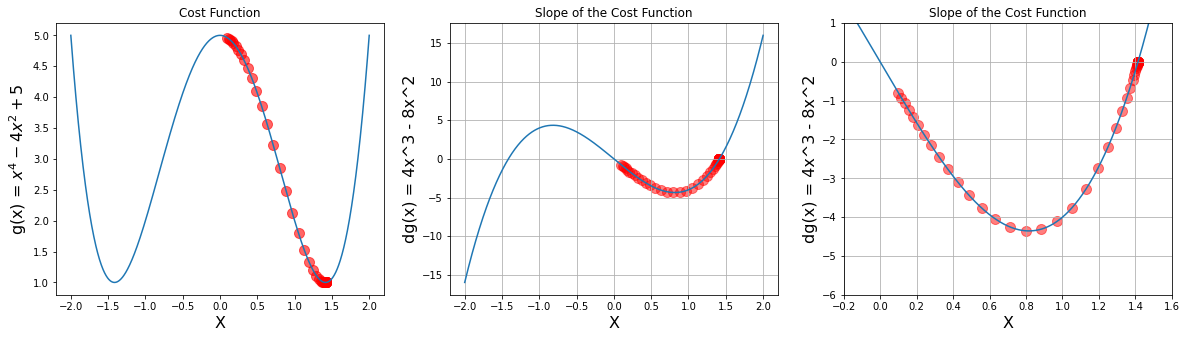

In [ ]:
# Superimpose the gradient descent calculations on original plots

#calling the Gradient Descent Function

localMinima, listOfX, listOfDerivatives = gradientDescent(derivativeFunc = dg, guessedX = 0.1)

plt.figure(figsize=[20, 5])

# Chart 01: Depicting the Cost Function
# and the adjoining values of x as we move towards the local minima taking tiny steps using the slope.
plt.subplot (1, 3, 1)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x) = $x^4 - 4x^2 + 5$', fontsize=16)
plt.plot(x_2, g(x_2))
values = np.array(listOfX)
plt.scatter(values, g(values), color = 'red', s = 100, alpha = 0.6)

# Chart 02: Depicting the Derivative function 
plt.subplot (1, 3, 2)
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x) = 4x^3 - 8x^2', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2))
plt.scatter(listOfX, listOfDerivatives, color = 'red', s = 100, alpha = 0.5)

# Chart 03: Gradient Descent (Close-Up) 
plt.subplot (1, 3, 3)
plt.title('Slope of the Cost Function')
plt.ylim(-6, 1)
plt.xlim(-0.2, 1.6)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x) = 4x^3 - 8x^2', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2))
plt.scatter(listOfX, listOfDerivatives, color = 'red', s = 100, alpha = 0.5)

plt.show()

# Example 3: Divergence and Overflow

## $f(x) = x^5 - 2x^4 + 2$

In [ ]:
#Make Data

x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3

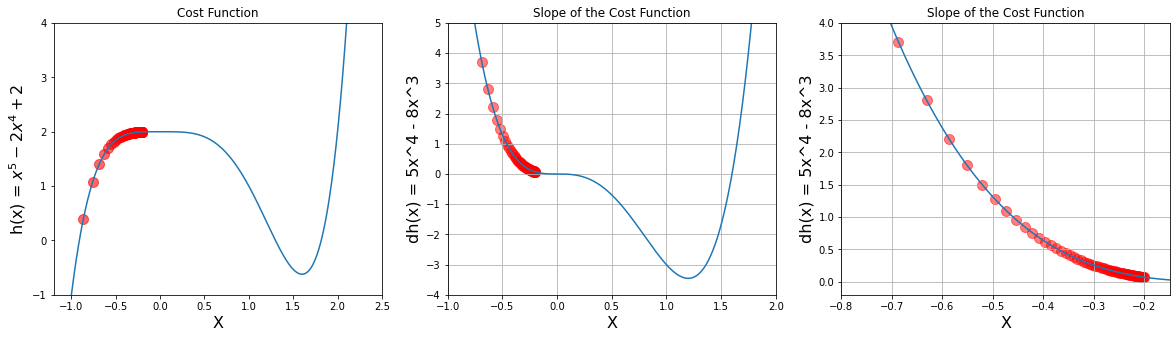

Local Minima Occurs at: -2071072.4470816324
The value of the cost function here is: -3.810455326061589e+31
The Number of time this loop ran: 72


In [ ]:
# Superimpose the gradient descent calculations on original plots

#calling the Gradient Descent Function

localMinima, listOfX, listOfDerivatives = gradientDescent(derivativeFunc = dh, guessedX = -0.2, maxIter = 71)

plt.figure(figsize=[20, 5])

# Chart 01: Depicting the Cost Function
# and the adjoining values of x as we move towards the local minima taking tiny steps using the slope.
plt.subplot (1, 3, 1)
plt.title('Cost Function')
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x) = $x^5 - 2x^4 + 2$', fontsize=16)
plt.plot(x_3, h(x_3))
values = np.array(listOfX)
plt.scatter(values, h(values), color = 'red', s = 100, alpha = 0.6)

# Chart 02: Depicting the Derivative function 
plt.subplot (1, 3, 2)
plt.title('Slope of the Cost Function')
plt.xlim(-1, 2)
plt.ylim(-4, 5) 
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x) = 5x^4 - 8x^3', fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3))
plt.scatter(listOfX, listOfDerivatives, color = 'red', s = 100, alpha = 0.5)

# Chart 03: Gradient Descent (Close-Up) 
plt.subplot (1, 3, 3)
plt.title('Slope of the Cost Function')
plt.ylim(-0.2, 4)
plt.xlim(-0.8, -0.15)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x) = 5x^4 - 8x^3', fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3))
plt.scatter(listOfX, listOfDerivatives, color = 'red', s = 100, alpha = 0.5)

plt.show()

#Printing out all the values of the minima and the cost function

print('Local Minima Occurs at:', localMinima)
print('The value of the cost function here is:', h(localMinima))
print("The Number of time this loop ran:", len(listOfX))

# Example 4: Data Visualization with 3D Charts

$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$

Minimise $f(x, y) = \frac{1}{r + 1}$ where, $r$ is $3^{-x^2 -y^2}$

In [ ]:
def f(x, y):
  r = 3**(-x**2 -y**2)
  return 1/(r + 1)

In [ ]:
# Make Data

x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

x_4, y_4 = np.meshgrid(x_4, y_4)

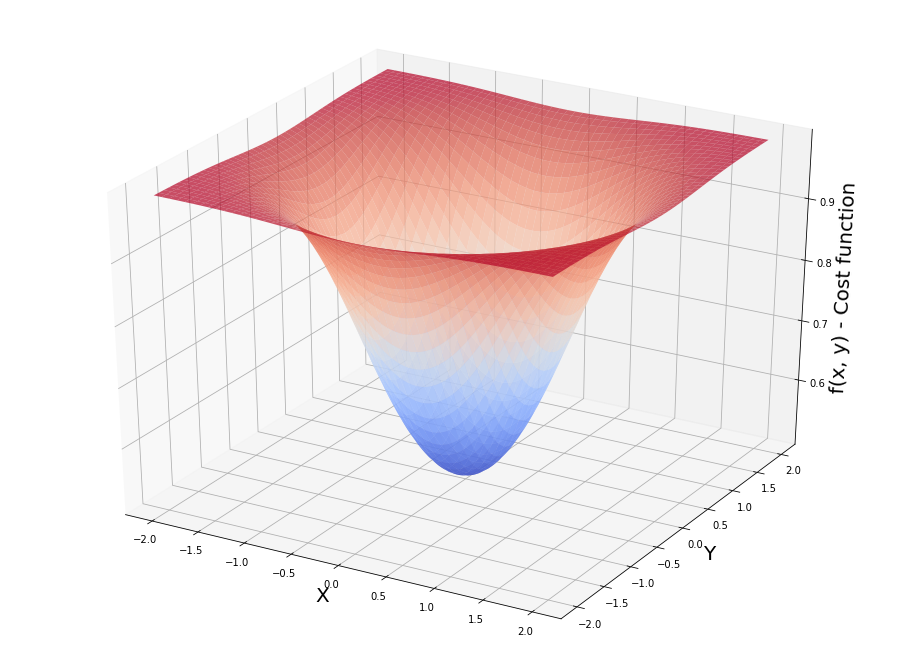

In [ ]:
# Generating a 3D Plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost function', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.7)

plt.show()

## Partial Derivatives and Symbolic Computations using SympPy.

## $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right) ^2}$

## $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right) ^2}$ 

In [ ]:
a, b = symbols('x, y')

print('Our Cost Fuction f(x, y) is:', f(a, b))
print('Our Partial Derivative w.r.t. x is:', diff(f(a, b), a))

 #This syntax below depics a key:value pair used to depict a dictionary
print('The value of the cost funtion f(x, y) at x = 1.8 and y = 1.0 is:', f(a, b).evalf(subs={a:1.8, b:1.0}))

print('The value of the partial derivative funtion df(x, y) at x = 1.8 and y = 1.0 is:', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our Cost Fuction f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Our Partial Derivative w.r.t. x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
The value of the cost funtion f(x, y) at x = 1.8 and y = 1.0 is: 0.990604794032582
The value of the partial derivative funtion df(x, y) at x = 1.8 and y = 1.0 is: 0.0368089716197505


## Batch Gradient Descent with SymPy
#### Batch gradient Descent Takes comparatively more time when processed using SymPy becasue the calculation involved is almost same, but the steps involved are comparatively more in number.

In [ ]:
#Setup

gamma = 0.1
maxIter = 500
params = np.array([1.8, 1.0]) #Initial Guess

for n in range(maxIter):
  gradX = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
  gradY = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
  gradients = np.array([gradX, gradY])
  params = params - gamma*gradients

#Results
print('Values in the gradient array', gradients)
print('Minimum cost occurs at x value of', params[0])
print('Minimum cost occurs at y value of', params[1])
print('The Minimum Cost is:', f(params[0], params[1]))

Values in the gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum cost occurs at x value of 3.45838599885832e-11
Minimum cost occurs at y value of 1.92132555492129e-11
The Minimum Cost is: 0.500000000000000


## Batch Gradient *Descent* without using SympPy.

## $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right) ^2}$

## $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right) ^2}$ 

In [ ]:
#Partial Dervative Function for Example 4

def fpx(x, y):
  r = 3**(-x**2 -y**2)
  return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
  r = 3**(-x**2 -y**2)
  return 2*y*log(3)*r / (r + 1)**2

In [ ]:
#Setup

gamma = 0.1
maxIter = 500
params = np.array([1.8, 1.0]) #Initial Guess

for n in range(maxIter):
  gradX = fpx(params[0], params[1])
  gradY = fpy(params[0], params[1])
  gradients = np.array([gradX, gradY])
  params = params - gamma*gradients

#Results
print('Values in the gradient array', gradients)
print('Minimum cost occurs at x value of', params[0])
print('Minimum cost occurs at y value of', params[1])
print('The Minimum Cost is:', f(params[0], params[1]))

Values in the gradient array [2.01013038e-11 1.11673910e-11]
Minimum cost occurs at x value of 3.458385998858304e-11
Minimum cost occurs at y value of 1.9213255549212797e-11
The Minimum Cost is: 0.5


##Graphing 3D Gradient Descent and Advance Numpy Arrays

In [ ]:
#Setup

gamma = 0.1
maxIter = 500
params = np.array([1.8, 1.0]) #Initial Guess
valuesArray = params.reshape(1, 2)

for n in range(maxIter):
  gradX = fpx(params[0], params[1])
  gradY = fpy(params[0], params[1])
  gradients = np.array([gradX, gradY])
  params = params - gamma*gradients
  valuesArray = np.append(valuesArray, params.reshape(1, 2), axis = 0)

print(valuesArray.shape)

#Results
print('Values in the gradient array', gradients)
print('Minimum cost occurs at x value of', params[0])
print('Minimum cost occurs at y value of', params[1])
print('The Minimum Cost is:', f(params[0], params[1]))

(501, 2)
Values in the gradient array [2.01013038e-11 1.11673910e-11]
Minimum cost occurs at x value of 3.458385998858304e-11
Minimum cost occurs at y value of 1.9213255549212797e-11
The Minimum Cost is: 0.5


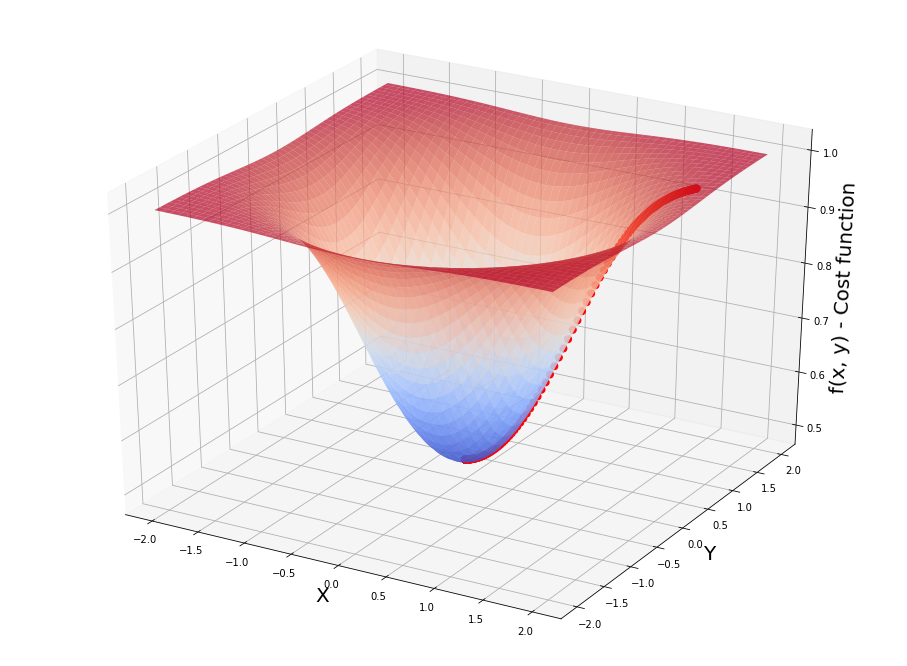

In [ ]:
# Generating a 3D Plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost function', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.7)
ax.scatter(valuesArray[:, 0], valuesArray[:, 1], f(valuesArray[:, 0], valuesArray[:, 1]), alpha=1, s=50, color='red')

plt.show()

#Example 5: Working with Real Data and a Real Cost Function

##Mean Sqaured Error: A cost function for real-time regression problems.

###$RSS = \sum_{i = 1}^{n}\big( y^{(i)} - h_\theta x^{(i)}\big)^2$

###$MSE = \frac{1}{n} \sum_{i = 1}^{n}\big( y^{(i)} - h_\theta x^{(i)}\ \big)^2$    _or,_

###$MSE = \frac{1}{n} \sum_{i = 1}^{n}\big( y^{(i)} - \hat{y} \big)^2$

In [ ]:
#Make Sample Data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).reshape(7, 1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

In [ ]:
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


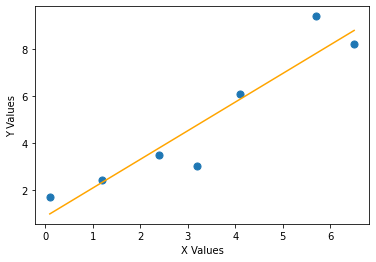

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange')
plt.xlabel('X Values')
plt.ylabel('Y Values')

plt.show()

###$\hat{y} = \theta_0 + \theta_1 x$

In [ ]:
y_hat = 0.8475351486029545 + 1.2227264637835913*x_5
print('The value of yHat are:\n', y_hat)
print('The comparable values of y are:\n', y_5)

The value of yHat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
The comparable values of y are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [ ]:
#A function for the mean squared error:

def mse(y, y_hat):
  #r = 1/7 * sum((y - y_hat)**2)
  #r = 1/y.size * sum((y - y_hat)**2)
  r = np.average((y - y_hat)**2, axis = 0)
  return r

In [ ]:
print('Manually Calculated MSE is:', mse(y_5, y_hat))
print('Maual Calculation using MSE function:', mean_squared_error(y_5, y_hat))
print('MSE regression through the functions:', mean_squared_error(y_5, regr.predict(x_5)))

Manually Calculated MSE is: [0.94796558]
Maual Calculation using MSE function: 0.9479655759794577
MSE regression through the functions: 0.9479655759794577


##3D Plot for the Mean squared Error Cost Function

In [ ]:
#Make Data for Thetas

nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [ ]:
#Nested Loops for calculating the MSE

plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

for i in range (nr_thetas):
  for j in range (nr_thetas):
    y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
    plot_cost[i][j] = mse(y_5, y_hat)

print('\nThe values of theta 0 are as follows:\n',plot_t0)
print('\nThe values of theta 1 are as follows:\n',plot_t1)
print('\nThe values of the MSE are as follows:\n',plot_cost)


The values of theta 0 are as follows:
 [[-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 ...
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]]

The values of theta 1 are as follows:
 [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.9798995  -0.9798995  -0.9798995  ... -0.9798995  -0.9798995
  -0.9798995 ]
 [-0.95979899 -0.95979899 -0.95979899 ... -0.95979899 -0.95979899
  -0.95979899]
 ...
 [ 2.95979899  2.95979899  2.95979899 ...  2.95979899  2.95979899
   2.95979899]
 [ 2.9798995   2.9798995   2.9798995  ...  2.9798995   2.9798995
   2.9798995 ]
 [ 3.          3.          3.     

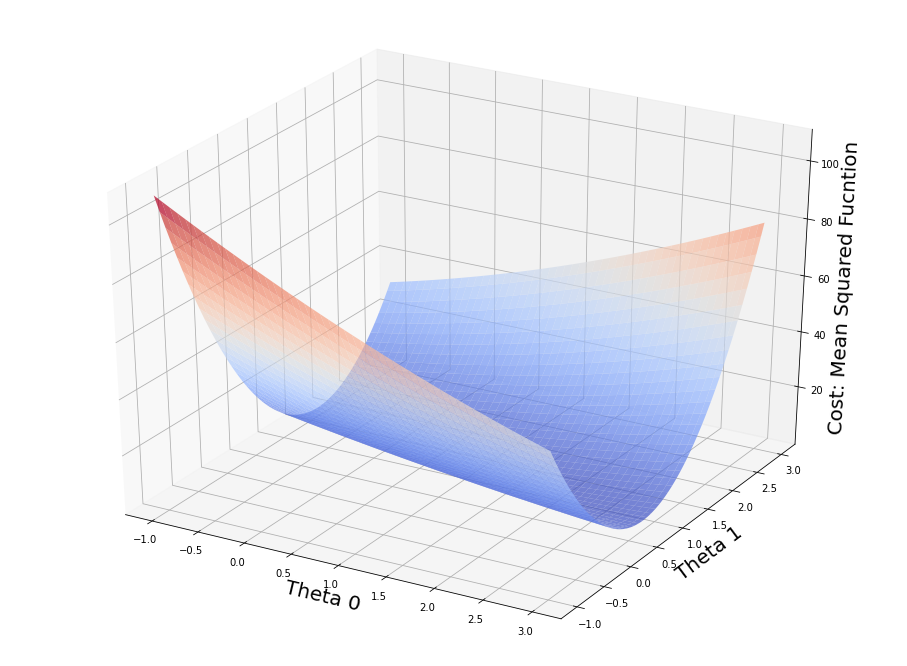

In [ ]:
#Plotting MSE 

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost: Mean Squared Fucntion', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm, alpha=0.7)
#ax.scatter(valuesArray[:, 0], valuesArray[:, 1], f(valuesArray[:, 0], valuesArray[:, 1]), alpha=1, s=50, color='red')

plt.show()

In [ ]:
#Printing the minima:

print('The Minima of the plot occurs at:', plot_cost.min())
ijMin = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Minima occurs at the indices:', ijMin)

The Minima of the plot occurs at: 0.9483826526747164
Minima occurs at the indices: (111, 91)


##Partial Derivatives of the Mean Sqaured Error Function w.r.t. $\theta_0$ and $\theta_1$ 

###$MSE = \frac{1}{n} \sum_{i = 1}^{n}\big( y^{(i)} - h_\theta x^{(i)}\ \big)^2$    _or,_

###$MSE = \frac{1}{n} \sum_{i = 1}^{n}\big( y^{(i)} - \hat{y} \big)^2$

###$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n}\big(y^i - \theta_0 - \theta_1 x^i \big)$

###$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n}\big(y^i - \theta_0 - \theta_1 x^i \big)\big(x^i\big)$


In [ ]:
#A function that return the slopes

def grad(x, y, thetas):
  n = y.size
  partTheta0 = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
  partTheta1 = (-2/n) * sum(y - thetas[0] - thetas[1]*x)*x

  return np.array([partTheta0[0], partTheta1[1]])
  #return np.append(arr=partTheta0, values=partTheta1)
  #return np.concatenate((partTheta0, partTheta1), axis=0)


In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

for i in range (1000):
  thetas = thetas - multiplier * grad(x_5, y_5, thetas)

print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 1.3707233065442026
Min occurs at Theta 1: [1.06486797]
MSE is: [1.0622689]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
